In [1]:
# Import the required libraries and dependencies
from matplotlib import animation
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Set data files input path
path = "../Data/"

In [3]:
# Read family incidents file
xls_lga_fi = pd.ExcelFile(path+'LGA_Family_Incidents_Year_Ending_September_2021.xlsx')

lga_fi_tab1 = pd.read_excel(xls_lga_fi, "Table 01")
lga_fi_tab2 = pd.read_excel(xls_lga_fi, "Table 02")
lga_fi_tab3 = pd.read_excel(xls_lga_fi, "Table 03")


In [4]:
lga_fi_tab1_nth = lga_fi_tab1['Family Incidents'].loc[(lga_fi_tab1['Police Region'].str[:1] == '1') 
                                                       & (lga_fi_tab1['Local Government Area'] == 'Total')].values
lga_fi_tab1_sth = lga_fi_tab1['Family Incidents'].loc[(lga_fi_tab1['Police Region'].str[:1] == '3') 
                                                       & (lga_fi_tab1['Local Government Area'] == 'Total')].values
lga_fi_tab1_east = lga_fi_tab1['Family Incidents'].loc[(lga_fi_tab1['Police Region'].str[:1] == '2') 
                                                       & (lga_fi_tab1['Local Government Area'] == 'Total')].values
lga_fi_tab1_west = lga_fi_tab1['Family Incidents'].loc[(lga_fi_tab1['Police Region'].str[:1] == '4') 
                                                       & (lga_fi_tab1['Local Government Area'] == 'Total')].values


In [5]:
# Family Incidents by year - police service regions comparision
lga_fi_tab1_nth = lga_fi_tab1['Family Incidents'].loc[(lga_fi_tab1['Police Region'].str[:1] == '1') 
                                                       & (lga_fi_tab1['Local Government Area'] == 'Total')].values
lga_fi_tab1_sth = lga_fi_tab1['Family Incidents'].loc[(lga_fi_tab1['Police Region'].str[:1] == '3') 
                                                       & (lga_fi_tab1['Local Government Area'] == 'Total')].values
lga_fi_tab1_east = lga_fi_tab1['Family Incidents'].loc[(lga_fi_tab1['Police Region'].str[:1] == '2') 
                                                       & (lga_fi_tab1['Local Government Area'] == 'Total')].values
lga_fi_tab1_west = lga_fi_tab1['Family Incidents'].loc[(lga_fi_tab1['Police Region'].str[:1] == '4') 
                                                       & (lga_fi_tab1['Local Government Area'] == 'Total')].values

# Get incidents rate per 100K population by Police Service Areas Regions
lga_fi_tab1_rate1 = lga_fi_tab1['Rate per 100,000 population'].loc[(lga_fi_tab1['Police Region'].str[:1] == '1') 
                                                       & (lga_fi_tab1['Local Government Area'] == 'Total')].values
lga_fi_tab1_rate2 = lga_fi_tab1['Rate per 100,000 population'].loc[(lga_fi_tab1['Police Region'].str[:1] == '2') 
                                                       & (lga_fi_tab1['Local Government Area'] == 'Total')].values
lga_fi_tab1_rate3 = lga_fi_tab1['Rate per 100,000 population'].loc[(lga_fi_tab1['Police Region'].str[:1] == '3') 
                                                       & (lga_fi_tab1['Local Government Area'] == 'Total')].values
lga_fi_tab1_rate4 = lga_fi_tab1['Rate per 100,000 population'].loc[(lga_fi_tab1['Police Region'].str[:1] == '4') 
                                                       & (lga_fi_tab1['Local Government Area'] == 'Total')].values

# Data cleaning - drop duplicates to unique year's value
fi_year = lga_fi_tab1['Year'].drop_duplicates()


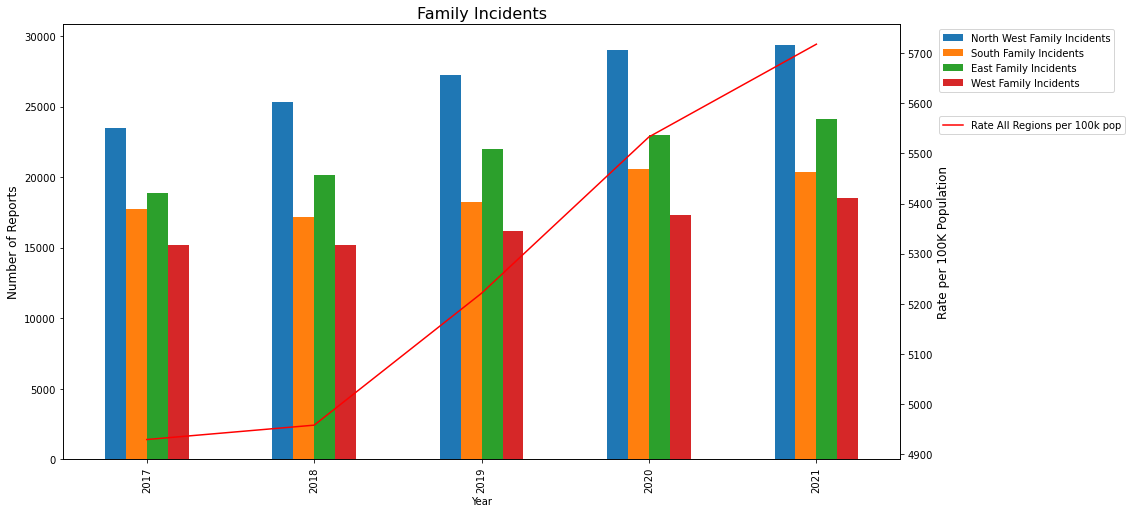

In [22]:
# Create new dataframe to hold the required data for each police service area region
fi_regional_sum = []
fi_regional_sum = pd.DataFrame({"Year": fi_year})
fi_regional_sum["North West Family Incidents"] = lga_fi_tab1_nth
fi_regional_sum["South Family Incidents"] = lga_fi_tab1_sth
fi_regional_sum["East Family Incidents"] = lga_fi_tab1_east
fi_regional_sum["West Family Incidents"] = lga_fi_tab1_west
fi_regional_sum["Rate All Regions per 100k pop"] = lga_fi_tab1_rate1+lga_fi_tab1_rate2+lga_fi_tab1_rate3+lga_fi_tab1_rate4

fi_regional_sum = fi_regional_sum.sort_values(by="Year").reset_index()

# Set up graph information
fig, ax1 = plt.subplots(figsize = (15,8))
ax2 = ax1.twinx()
ax2.set_ylabel('Rate per 100K Population',fontsize=12)
ax1.set_ylabel('Number of Reports',fontsize=12)

# Generate bars plot showing the distribution incidents for each region
fi_regional_sum.plot(x="Year",y=["North West Family Incidents","South Family Incidents","East Family Incidents","West Family Incidents"],kind="bar",ax=ax1)
fi_regional_sum.plot(y=["Rate All Regions per 100k pop"],kind="line", color='red',ax=ax2)

# Relocate the legend box outside the graph
ax1.legend(bbox_to_anchor=(1.04,1))
ax2.legend(bbox_to_anchor=(1.04,0.8), loc="upper left")

# Label and plot graphs
plt.title("Family Incidents",fontsize=16)
plt.xlabel("Year",fontsize=16)
plt.show()

In [7]:
# Showing statistic data of each region for the last 5 years (2017 - 2021) with rounding up 2 decimal points
fi_regional_sum.describe().round(decimals=2)

,index,Year,North West Family Incidents,South Family Incidents,East Family Incidents,West Family Incidents,Rate All Regions per 100k pop
count,5.00,5.00,5.0,5.00,5.00,5.00,5.00
mean,174.00,2019.00,26880.6,18833.80,21617.80,16466.60,5271.89
std,137.56,1.58,2483.1,1555.45,2110.71,1438.44,348.07
min,0.00,2017.00,23485.0,17192.00,18860.00,15165.00,4929.67
25%,87.00,2018.00,25345.0,17751.00,20172.00,15171.00,4958.32
50%,174.00,2019.00,27205.0,18256.00,21996.00,16193.00,5221.21
75%,261.00,2020.00,29013.0,20378.00,22954.00,17307.00,5532.73
max,348.00,2021.00,29355.0,20592.00,24107.00,18497.00,5717.49


In [8]:
# Create a new data frame add population column, & removed unwanted data
lga_fi_tab1_total = []

lga_fi_tab1_total = lga_fi_tab1
lga_fi_tab1_total = lga_fi_tab1_total[lga_fi_tab1_total["Local Government Area"].str.contains("Total")==False]
lga_fi_tab1_total["Population"] = lga_fi_tab1_total["Family Incidents"]/lga_fi_tab1_total["Rate per 100,000 population"]*100000
lga_fi_tab1_total = lga_fi_tab1_total.loc[(lga_fi_tab1_total["Police Region"]!="Justice Institutions and Immigration Facilities") & 
                                      (lga_fi_tab1_total["Police Region"]!="Unincorporated Vic")]

In [ ]:
# Top 5 LGAs have highest family incidents for 2020
lga_fi_tab1_20_count = []
lga_fi_tab1_20_count = lga_fi_tab1_total.loc[(lga_fi_tab1_total["Year"]==2020)].sort_values("Family Incidents", ascending=False)

# Formatting numbers
lga_fi_tab1_20_count["Rate per 100,000 population"] = lga_fi_tab1_20_count["Rate per 100,000 population"].round(decimals=2)
lga_fi_tab1_20_count["Population"] = lga_fi_tab1_20_count["Population"].round(decimals=2)

cols=["Family Incidents","Rate per 100,000 population","Population"]
lga_fi_tab1_20_count[cols] = lga_fi_tab1_20_count[cols].map('{:,}'.format)
lga_fi_tab1_20_count = lga_fi_tab1_20_count.round(decimals=2)

# Print top 5 LGAs
print(f"\33[34m\033[1mThe top 5 LGAs with highest Family Incidents number for Year 2020\033[0m")
lga_fi_tab1_20_count = lga_fi_tab1_20_count.head(5).drop(["Year ending"], axis=1).reset_index(drop=True)
lga_fi_tab1_20_count

In [ ]:
# Top 5 LGAs have highest family incidents for 2021
lga_fi_tab1_21_count = []
lga_fi_tab1_21_nbr = []
lga_fi_tab1_21_count = lga_fi_tab1_total.loc[(lga_fi_tab1_total["Year"]==2021)].sort_values("Family Incidents", ascending=False)

# Formatting numbers
lga_fi_tab1_21_count["Rate per 100,000 population"] = lga_fi_tab1_21_count["Rate per 100,000 population"].round(decimals=2)
lga_fi_tab1_21_count["Population"] = lga_fi_tab1_21_count["Population"].round(decimals=2)
lga_fi_tab1_21_nbr = lga_fi_tab1_21_count

cols=["Family Incidents","Rate per 100,000 population","Population"]
lga_fi_tab1_21_count[cols] = lga_fi_tab1_21_count[cols].map('{:,}'.format)
lga_fi_tab1_21_count = lga_fi_tab1_21_count.round(decimals=2)

# Print top 5 LGAs
print(f"\33[34m\033[1mThe top 5 LGAs with highest Family Incidents number for Year 2021\033[0m")
lga_fi_tab1_21_count = lga_fi_tab1_21_count.head(5).drop(["Year ending"], axis=1).reset_index(drop=True)
lga_fi_tab1_21_count

In [11]:
# Get values for Family Incidents and Rate for year 2020 and 2021
lga_fi_tab1_21_count["Rate per 100,000 population"] = lga_fi_tab1_21_count["Rate per 100,000 population"].str.replace(',','').astype(float)
lga_fi_tab1_21_count["Family Incidents"] = lga_fi_tab1_21_count["Family Incidents"].str.replace(',','').astype(int)
lga_fi_tab1_20_count["Rate per 100,000 population"] = lga_fi_tab1_20_count["Rate per 100,000 population"].str.replace(',','').astype(float)
lga_fi_tab1_20_count["Family Incidents"] = lga_fi_tab1_20_count["Family Incidents"].str.replace(',','').astype(int)


In [12]:
lga_fi_tab1_20_count

,Year,Police Region,Local Government Area,Family Incidents,"Rate per 100,000 population",Population
0,2020,3 Southern Metro,Casey,5134,1408.12,"364,600.0"
1,2020,1 North West Metro,Hume,4227,1752.57,"241,188.0"
2,2020,4 Western,Greater Geelong,4179,1577.78,"264,866.0"
3,2020,1 North West Metro,Wyndham,3571,1260.53,"283,294.0"
4,2020,1 North West Metro,Whittlesea,3303,1396.39,"236,539.0"


In [13]:
lga_fi_tab1_21_count

,Year,Police Region,Local Government Area,Family Incidents,"Rate per 100,000 population",Population
0,2021,3 Southern Metro,Casey,5334,1443.80,"369,441.75"
1,2021,4 Western,Greater Geelong,4210,1553.63,"270,978.03"
2,2021,1 North West Metro,Hume,4132,1682.66,"245,563.35"
3,2021,1 North West Metro,Wyndham,4022,1383.77,"290,654.21"
4,2021,1 North West Metro,Whittlesea,3249,1364.71,"238,072.07"


In [14]:
# Calculate Family Incidents rate  between 2020 and 2021
fi_increase = (lga_fi_tab1_21_count.iat[0,3] - lga_fi_tab1_20_count.iat[0,3])/lga_fi_tab1_20_count.iat[0,3]*100
print(f"\33[34m\033[1mThe top LGA that has Family Incidents increased 2 years (2020 & 2021) in a row is in region: '{lga_fi_tab1_21_count.iat[0,1]}'\033[0m")
print(f"\33[34m\033[1mThe Family Incidents had been increased by {round(fi_increase,2)}% from year 2020 to 2021\033[0m")


The top LGA that has Family Incidents increased 2 years (2020 & 2021) in a row is in region: '3 Southern Metro'
The Family Incidents had been increased by 3.9% from year 2020 to 2021


In [15]:
# Initialise variables
fi_tab3_2020= []
fi_tab3_2021= []

# Select only data for 2020 and 2021 where family incidents had been increased
fi_tab3_2020 = lga_fi_tab3[lga_fi_tab3["Year"] == 2020].reset_index(drop=True)
fi_tab3_2021 = lga_fi_tab3[lga_fi_tab3["Year"] == 2021].reset_index(drop=True)


In [16]:
fi_tab3_2020_casey = fi_tab3_2020[fi_tab3_2020["Local Government Area"]== "Casey"].reset_index(drop=True)
fi_tab3_2020_casey

,Year,Year ending,Local Government Area,AFM Sex,AFM Counter
0,2020,September,Casey,Females,3820
1,2020,September,Casey,Males,1311


In [17]:
# Calculate the percentage gender that taking the lead in involving family incidents in Casey for year 2020
gender_pct = round(fi_tab3_2020_casey.iat[0,4]/(fi_tab3_2020_casey.iat[0,4]+fi_tab3_2020_casey.iat[1,4])*100,2)
print(f"\33[34m\033[1mIn Year 2020, the gender that involved in the Family Incidents in LGA Casey is Female with {gender_pct}%\033[0m")


In Year 2020, the gender that involved in the Family Incidents in LGA Casey is Female with 74.45%


In [18]:
fi_tab3_2021_casey = fi_tab3_2021[fi_tab3_2020["Local Government Area"]== "Casey"].reset_index(drop=True)
fi_tab3_2021_casey 

,Year,Year ending,Local Government Area,AFM Sex,AFM Counter
0,2021,September,Casey,Females,3863
1,2021,September,Casey,Males,1458


In [19]:
# Calculate the percentage gender that taking the lead in involving family incidents in Casey for year 2021
gender_pct = round(fi_tab3_2021_casey.iat[0,4]/(fi_tab3_2021_casey.iat[0,4]+fi_tab3_2021_casey.iat[1,4])*100,2)
print(f"\33[34m\033[1mIn Year 2021, the gender that involved in the Family Incidents in LGA Casey is Female with {gender_pct}%\033[0m")


In Year 2021, the gender that involved in the Family Incidents in LGA Casey is Female with 72.6%


In [ ]:
# Top 5 LGAs have highest family incidents rate for 2020
lga_fi_tab1_20_rate = []
lga_fi_tab1_20_rate = lga_fi_tab1_total.loc[(lga_fi_tab1_total["Year"]==2020)].sort_values("Rate per 100,000 population", ascending=False)

# Formatting numbers
lga_fi_tab1_20_rate["Rate per 100,000 population"] = lga_fi_tab1_20_rate["Rate per 100,000 population"].round(decimals=2)
lga_fi_tab1_20_rate["Population"] = lga_fi_tab1_20_rate["Population"].round(decimals=2)

cols=["Family Incidents","Rate per 100,000 population","Population"]
lga_fi_tab1_20_rate[cols] = lga_fi_tab1_20_rate[cols].map('{:,}'.format)
lga_fi_tab1_20_rate = lga_fi_tab1_20_rate.round(decimals=2)

# Print top 5 LGAs
print(f"\33[34m\033[1mThe top 5 LGAs with highest Family Incidents Rate per 100K Population for Year 2020\033[0m")
lga_fi_tab1_20_rate = lga_fi_tab1_20_rate.head(5).drop(["Year ending"], axis=1).reset_index(drop=True)
lga_fi_tab1_20_rate

In [ ]:
# Top 5 LGAs hav highest family incidents rate for 2021
lga_fi_tab1_21_rate = []
lga_fi_tab1_21_rate = lga_fi_tab1_total.loc[(lga_fi_tab1_total["Year"]==2021)].sort_values("Rate per 100,000 population", ascending=False)

# Formatting numbers
lga_fi_tab1_21_rate["Rate per 100,000 population"] = lga_fi_tab1_21_rate["Rate per 100,000 population"].round(decimals=2)
lga_fi_tab1_21_rate["Population"] = lga_fi_tab1_21_rate["Population"].round(decimals=2)

cols=["Family Incidents","Rate per 100,000 population","Population"]
lga_fi_tab1_21_rate[cols] = lga_fi_tab1_21_rate[cols].map('{:,}'.format)
lga_fi_tab1_21_rate = lga_fi_tab1_21_rate.round(decimals=2)

# Print top 5 LGAs
print(f"\33[34m\033[1mThe top 5 LGAs with highest Family Incidents Rate per 100K Population for Year 2021\033[0m")
lga_fi_tab1_21_rate = lga_fi_tab1_21_rate.head(5).drop(["Year ending"], axis=1).reset_index(drop=True)
lga_fi_tab1_21_rate